In [1]:
# Import the libraries will be used for this lab.
# The torch.manual_seed() is for forcing the random function to give the same number every time we try to recompile it.

import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [2]:
# download smaller version dataset and index csv file

import wget

directory = "C:\\Users\\15010\\pytorch_dataset"
url_data = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/img.tar.gz"
url_csv =  "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv" 
wget.download(url_data, out=directory)
wget.download(url_csv, out=directory)

'C:\\Users\\15010\\pytorch_dataset/index (1).csv'

In [3]:
# get current work directory

import os

os.getcwd() 

'C:\\Users\\15010'

In [4]:
# Extract files from tar file

import tarfile

os.chdir("C:\\Users\\15010\\pytorch_dataset")

tf = tarfile.open("img.tar.gz", mode = 'r')
tf.extractall()

In [5]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [6]:
# Read CSV file from the URL and print out the first five samples

csv_file = "index.csv"
csv_path = os.path.join(directory,csv_file)
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [7]:
# Print out the file name and the class number of the element on row 1 (the second row)
# CAN'T use index directly after dataframe(e.g. data_name[0,0])
print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

# Print out the total number of rows in traing dataset

print('The number of rows: ', data_name.shape[0])

File name: img/fashion1.png
class or y: T-shirt
The number of rows:  60000


In [8]:
# Load Image

In [9]:
# Combine the directory path with file name

image_name =data_name.iloc[1, 1]
image_name

'img/fashion1.png'

In [10]:
image_path=os.path.join(directory,image_name)
image_path

'C:\\Users\\15010\\pytorch_dataset\\img/fashion1.png'

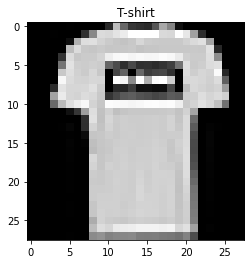

In [11]:
# Use Image.open to store the image to the variable image and display the image and class

# Plot the second image

image = Image.open(image_path)
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.title(data_name.iloc[1,0])
plt.show()

In [12]:
# Create a Dataset Class

In [19]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform = None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [20]:
# Create the dataset objects

dataset = Dataset(csv_file=csv_file, data_dir=directory)

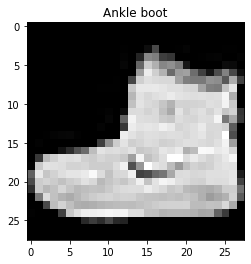

In [21]:
# Each sample of the image and the class y is stored in a tuple dataset[sample]. 
# The image is the first element in the tuple dataset[sample][0].
# The label or class is the second element in the tuple  dataset[sample][1].

image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

In [22]:
y

'Ankle boot'

In [23]:
# Torchvision Transforms

In [24]:
import torchvision.transforms as transforms

In [25]:
# Combine two transforms: crop and convert to tensor. 
# Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)

The shape of the first element tensor:  torch.Size([1, 20, 20])


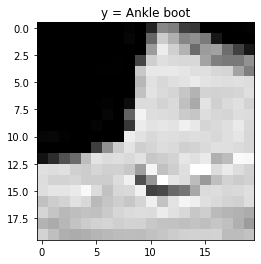

In [26]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

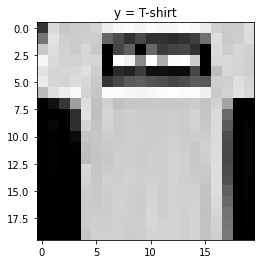

In [27]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

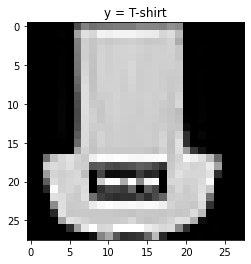

In [30]:
fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),
                                                transforms.RandomHorizontalFlip(p = 1),
                                                transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])

In [31]:
# Prebuilt Datasets and Transforms

In [32]:
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [33]:
# Import the prebuilt dataset into variable dataset

dataset = dsets.MNIST(
    root = './data', 
    train = False, 
    download = True, 
    transform = transforms.ToTensor()
)

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...


F:\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [36]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1].item()))

In [37]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?

print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  7
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


AttributeError: 'int' object has no attribute 'item'

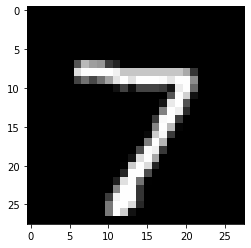

In [38]:
# Plot the first element in the dataset

show_data(dataset[0])

AttributeError: 'int' object has no attribute 'item'

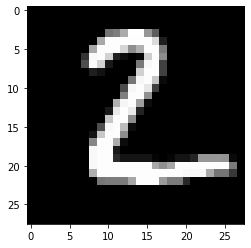

In [39]:
# Plot the second element in the dataset

show_data(dataset[1])

In [40]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


AttributeError: 'int' object has no attribute 'item'

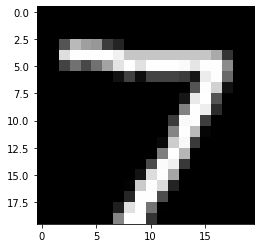

In [41]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

AttributeError: 'int' object has no attribute 'item'

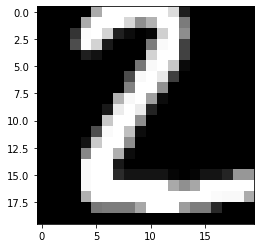

In [42]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

AttributeError: 'int' object has no attribute 'item'

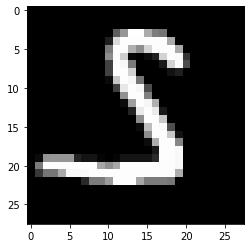

In [43]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = fliptensor_data_transform)
show_data(dataset[1])